In [1]:
from utils import *

In [2]:
top5 = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.01_1%I_top5_with_0s.tsv", sep='\t')

In [3]:
top5_same = get_matching_rows(top5, 'query', 'reference')
merged_top5_same = append_classes(top5_same, 'query')

merged_top5_same_N = merged_top5_same.copy()

# exclude nitrigen
merged_top5_same = merged_top5_same[merged_top5_same['N'] != True]

# Apply the function to each row of the DataFrame
merged_top5_same_N['true_names'] = merged_top5_same_N.apply(lambda row: get_true_names(row, merged_top5_same_N), axis=1)
merged_top5_same['true_names'] = merged_top5_same.apply(lambda row: get_true_names(row, merged_top5_same), axis=1)

# Convert the list of names to a comma-separated string
merged_top5_same_N['true_names'] = merged_top5_same_N['true_names'].apply(lambda lst: ', '.join(lst))
merged_top5_same['true_names'] = merged_top5_same['true_names'].apply(lambda lst: ', '.join(lst))


[13:10:54] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[13:10:54] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[13:10:54] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[13:10:54] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[13:10:54] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[13:10:54] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[13:10:54] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[13:10:54] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[13:10:54] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[13:10:54] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[13:10:55] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)

In [4]:
mdf = preprocess_data(merged_top5_same)

mdf_N = preprocess_data(merged_top5_same_N)

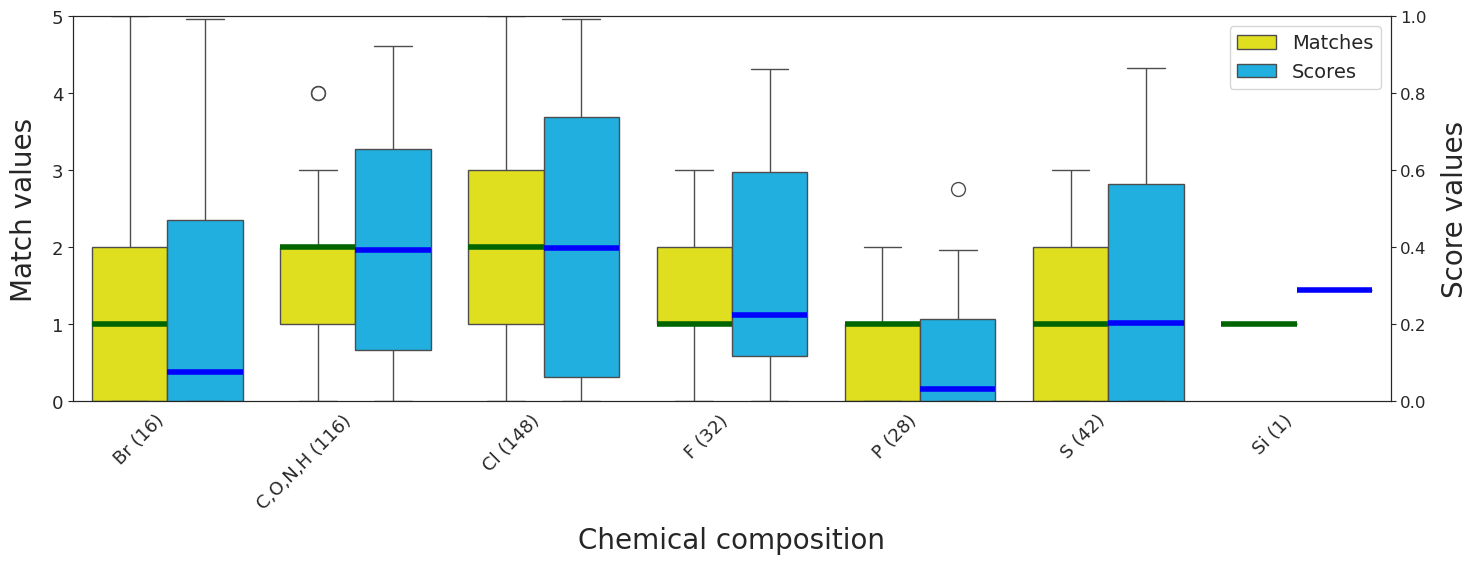

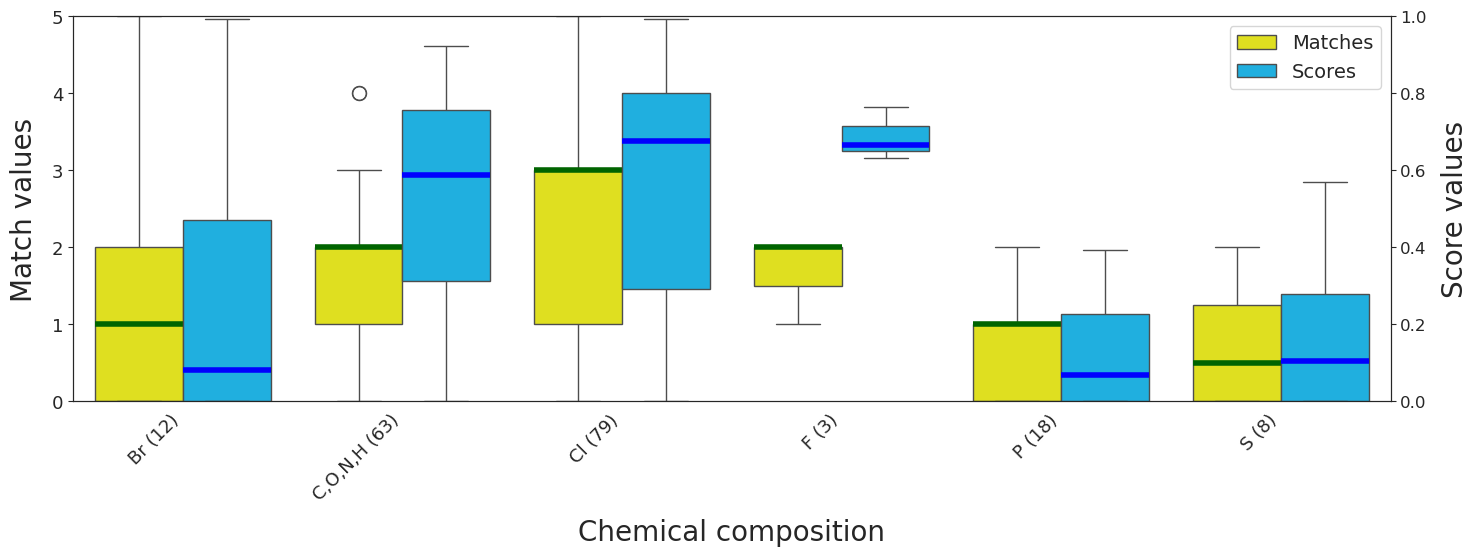

In [5]:
# with Nitrogen plot 1
mdf_N_p1 = split_and_add_rows(mdf_N, 'true_names', split_by=', ')
mdf_N_p1 = mdf_N_p1.sort_values(by=['true_names'])

create_plot(mdf_N_p1, '../Python_scripts/chemical_composition_boxplot_N.png')

# without Nitrogen plot 1
mdf_p1 = split_and_add_rows(mdf, 'true_names', split_by=', ')
mdf_p1 = mdf_p1.sort_values(by=['true_names'])

create_plot(mdf_p1, '../Python_scripts/chemical_composition_boxplot.png')

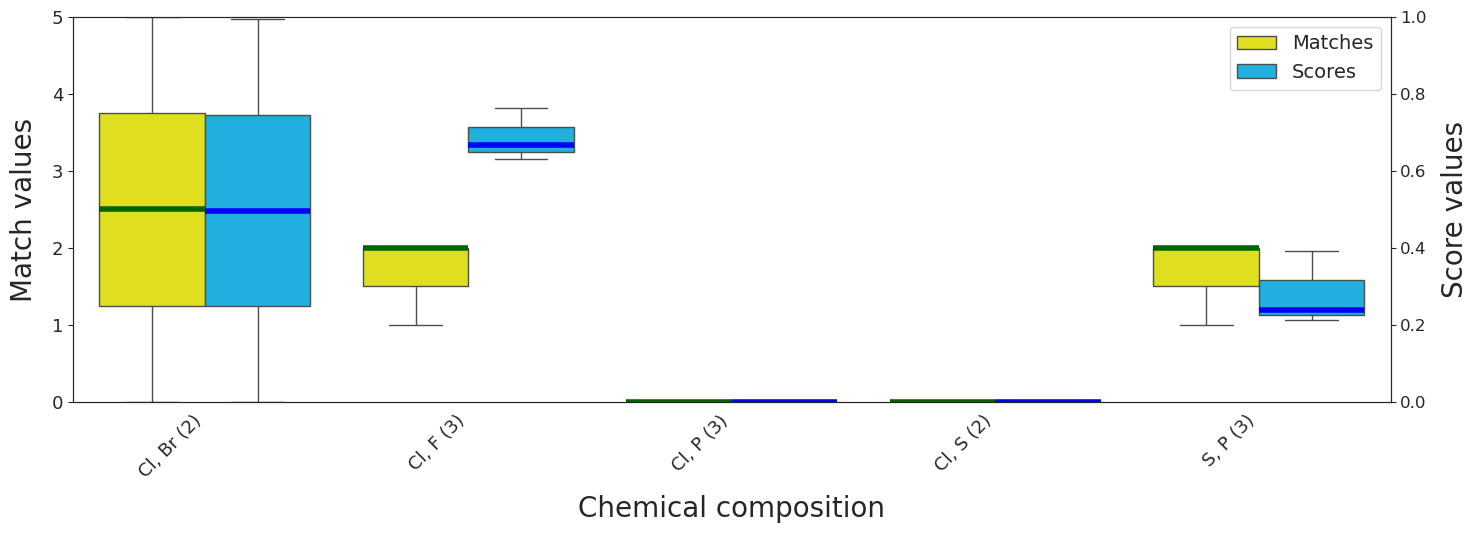

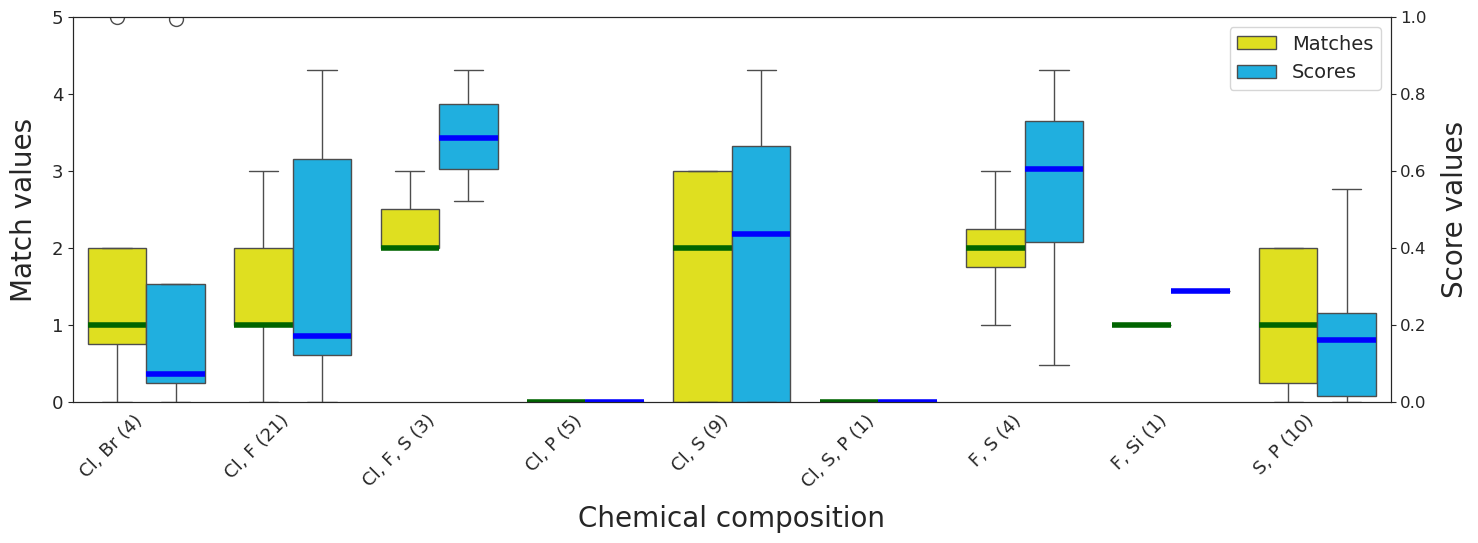

In [6]:
# without Nitrogen plot 2
mdf_p2 = generate_combinations(mdf, 'true_names')
mdf_p2 = mdf_p2.sort_values(by=['true_names'])

create_plot(mdf_p2, '../Python_scripts/chemical_composition_boxplot2.png')

# with Nitrogen plot 2
mdf_N_p2 = generate_combinations(mdf_N, 'true_names')
mdf_N_p2 = mdf_N_p2.sort_values(by=['true_names'])

create_plot(mdf_N_p2, '../Python_scripts/chemical_composition_boxplot2_N.png')